# Remark about Python version
This code was written using Python 3, and I was not carefult to ensure backward compatibility in any way (i.e. with default py2 integer division).

Testing this in anything but python 3 would be a misrepresentation of the solutions provided, so please test in python 3.

# Question 1.6 Code

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Perform the two methods for k=1..n.
n = 10000
ks = range(1, n + 1)

# Parameters, a=0, b=1.
a = 0.0
b = 1.0
h = (b - a) / n

# The true set of results to compare against.
true_result = np.linspace(0, 1, n+1)

# Recursive approach is simple to code iteratively.
rec_result = list()
current_result = a
rec_result.append(a)

for i in ks:
    current_result += h
    rec_result.append(current_result)

# Multiplicative approach is simple as a list comprehension.
mul_result = [a + k * h for k in range(0, n + 1)]

rec_error = [(true_res - rec_res)**2 for (true_res, rec_res) in zip(true_result, rec_result)]
mul_error = [(true_res - mul_res)**2 for (true_res, mul_res) in zip(true_result, mul_result)]

fig = plt.figure()
fig.suptitle("Squared error at each term for different linspace methods")
plt.xlabel("Value of K (unitless)")
plt.ylabel("Mean Squared Error of x_k (unitless)")
plt.plot(range(0, n+1), rec_error, label="recursive_error")
plt.plot(range(0, n+1), mul_error, label="multiplicative error")
plt.legend(loc="best")
plt.show()

# Question 1.7 Code

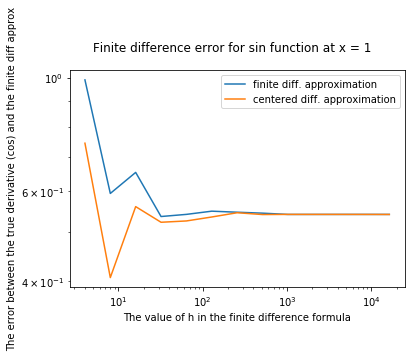

In [12]:
%matplotlib inline
from math import sin, cos
import matplotlib.pyplot as plt


def finite_difference(fn, x, h):
    """Finite difference approximation of the derivative
    of the function `fn` at x: i.e. fn'(x).
    
    The finite difference approximation is given as
    
            f(x + h) - f(x)
    f'(x) = ---------------
                   h
    """
    return (fn(x + h) - fn(x)) / h


def centered_difference(fn, x, h):
    """Centered difference approximation of the derivative
    of the function `fn` at x: i.e. fn'(x).
    
    The centered difference approximation is given as
    
            f(x + h) - f(x - h)
    f'(x) = -------------------
                    2h
    """
    return (fn(x + h) - fn(x - h)) / h


# Test the implementation using the sin function.
x = 1.0
powers = range(2, 15)
h_set = [2 ** exp for exp in powers]

finite_diff_errors = [abs(cos(x) - finite_difference(sin, x, h)) for h in h_set]
centered_diff_errors = [abs(cos(x)- centered_difference(sin, x, h)) for h in h_set]

fig = plt.figure()
fig.suptitle("Finite difference error for sin function at x = 1")
plt.xlabel("The value of h in the finite difference formula")
plt.ylabel("The error between the true derivative (cos) and the finite diff approx")
plt.loglog(h_set, finite_diff_errors, label="finite diff. approximation")
plt.loglog(h_set, centered_diff_errors, label="centered diff. approximation")
plt.legend(loc="best")
plt.show()

# Question 1.9 Code

[0.7342215128027164, 0.00010433441423463086, 7.2440008560647795e-09, 2.136883067284701e-13, 3.017899073375402e-16, 1.6337129034990842e-16, 1.915039717654698e-16, 3.3032796463874436e-16, 0.0, 2.457086589859197e-16]


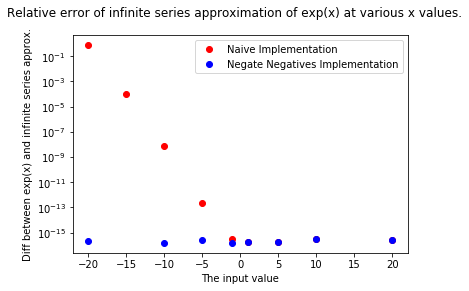

In [52]:
%matplotlib inline
from math import factorial, exp
import matplotlib.pyplot as plt

def infinite_series_exp(x):
    """Infinite series implementation of the exponential function.
    
    Since each term grows smaller, it makes sense to stop adding
    terms when our current term is rounded in the computer to 0.
    """
    result = 1  # Steady state 1 in the sum no matter what x is.
    p = 1  # Value of exponent, divisor (before factorial) and index.
    
    while True:
        current_term_value = (x ** p) / factorial(p)
        
        # Stopping condition for the infinite series.
        if current_term_value == 0:
            break
        
        result += current_term_value
        p += 1
    
    return result


def negated_inf_series(x):
    """Improved infinite series implementation by flipping negatives.
    
    The infinite series approximation has a lot of canceling errors.
    If the input value is negative, we simply calculate the positive
    approximation, and do 1 divided by the result.
    """
    result = infinite_series_exp(x) if x >= 0 else 1 / infinite_series_exp(-x)
    return result


def grouped_infinite_series_exp(x):
    """Improves upon the infinite series represenation of exp.
    
    It does so by computing negative and positive terms seperately
    in the negative case, then doing the subtraction at the end.
    """
    if x >= 0:
        return infinite_series_exp(x)
    
    x = abs(x)
    p = 1
    pr = 1  # pr -> positive result
    nr = 0  # nr -> negative result
    
    while True:
        cur = (x ** p) / factorial(p)
        
        if cur == 0:
            break

        # Update the result groups based on whether we are at a positive or negative power.
        (pr, nr) = (pr + cur, nr) if p % 2 == 0 else (pr, nr + cur)
        p += 1

    return pr - nr


# Test the implementation at different values of x.
xs = [-20, -15, -10, -5, -1, 1, 5, 10, 15, 20]

relative_error_naive = [(abs(exp(x) - infinite_series_exp(x))) / exp(x) for x in xs]
relative_error_simple_improvemend = [(abs(exp(x) - negated_inf_series(x))) / exp(x) for x in xs]

print(error_naive)

fig = plt.figure()
fig.suptitle("Relative error of infinite series approximation of exp(x) at various x values.")
plt.xlabel("The input value")
plt.ylabel("Diff between exp(x) and infinite series approx.")
plt.plot(xs, relative_error_naive, 'ro', label="Naive Implementation")
plt.plot(xs, relative_error_simple_improvemend, 'bo', label="Negate Negatives Implementation")
plt.legend(loc="best")
plt.yscale('log')
plt.show()

# Question 1.10 Code

In [67]:
%matplotlib inline
import sys
from math import sqrt
from random import random


def standard_quadratic(disc_sqrt, b, a):
    """Quadratic formula in standard form."""
    return (-b + disc_sqrt) / (2 * a)


def alternative_quadratic(disc_sqrt, b, c):
    """Quadratic formula in the alternative form."""
    return (2 * c) / (-b - disc_sqrt)


def quadratic(a, b, c):
    """The point of this function is to pick the best quadratic implementation.
    
    We do so by inspecting the inputs for anomalies or issues.
    See the block comments in the code for explanations of the logic.
    Briefly though:
        1 - check for linear
        2 - check for imaginary roots
        3 - check for repeating roots
        4 - select form that avoids cancelation.
    """
    root1 = root2 = float('nan')
    discriminant = b**2 - 4 * a * c
    
    # The first set is where the a is too small, such that it
    # must be considered to be zero.
    # There is only one root in this case since we now have
    # a linear function of x.
    if a < sys.float_info.epsilon:
        # If we have a negligible value of b, then we have a
        # constant function, therefore no roots, or roots everywhere
        # (i.e. the constant is 0). Either way, it's not worth handling.
        if abs(b) >= sys.float_info.epsilon:
            root1 = -c / b
    
    elif discriminant < 0:
        # The next thing we need to check is the discriminant.
        # If we have a non-zero a, then we have to use one of
        # the quadratic formulae. However, if the discriminant
        # is negative, we will have an imaginary result, which
        # we were told not to handle in the problem.
        print("Will produce imaginary roots.")
        
    elif sqrt(discriminant) < sys.float_info.epsilon:
        # If the square root of the determinant is negligible,
        # then there is effectively no difference between
        # the roots in the quadratic equation, so we have
        # a repearting root. Since we know the a value is
        # non-zero if we've made it here, it is safest to use
        # the standard form of the quadratic equation.
        root1 = -b / (2 * a)
        root2 = root1

    else:
        # Once we've made it here, the point is to avoid cancelation
        # issues. Since we know the square root of the determinant
        # must be positive if we've made it here, the best way to
        # proceed is to select the form which makes the sign of b
        # the same as the sign of the determinant in the formula.
        disc_sqrt = sqrt(discriminant)
        if b > 0:
            # b is positive, so use the alternative formula for
            # the first root (same sign on b and disc) and the
            # standard formula for the second root (inverse sign
            # on b and disc, so the second root has matched sign).
            root1 = alternative_quadratic(disc_sqrt, b, c)
            root2 = standard_quadratic(-disc_sqrt, b, a)
        else:
            # Same reasoning as above, but flipped.
            root1 = standard_quadratic(disc_sqrt, b, a)
            root2 = alternative_quadratic(-disc_sqrt, b, c)
            
    return root1, root2


def main():
    #         a       b      c
    tests = [[6,      5,    -4],
             [6e30,   5e30, -4e30],
             [0,      1,     1],
             [1,     -1e5,   1],
             [1,     -4,     3.99999999],
             [1e-30, -1e30,  1e30]]
    
    for test in tests:
        # For latex.
        # print("{} & {} & {} & {} & {}\\\\".format(*test, *quadratic(*test)))

        # Slightly more readable.
        print("Input quadratic: {}x^2 + {}x + {}".format(*test))
        print("Roots: {}".format(quadratic(*test)))
        print("-------------------------------------------")
        
main()

Input quadratic: 6x^2 + 5x + -4
Roots: (0.5, -1.3333333333333333)
-------------------------------------------
Input quadratic: 6e+30x^2 + 5e+30x + -4e+30
Roots: (0.5, -1.3333333333333335)
-------------------------------------------
Input quadratic: 0x^2 + 1x + 1
Roots: (-1.0, nan)
-------------------------------------------
Input quadratic: 1x^2 + -100000.0x + 1
Roots: (99999.99999, 1.0000000001000001e-05)
-------------------------------------------
Input quadratic: 1x^2 + -4x + 3.99999999
Roots: (2.000099999999696, 1.999900000000304)
-------------------------------------------
Input quadratic: 1e-30x^2 + -1e+30x + 1e+30
Roots: (1.0, nan)
-------------------------------------------


# Question 1.14 Code

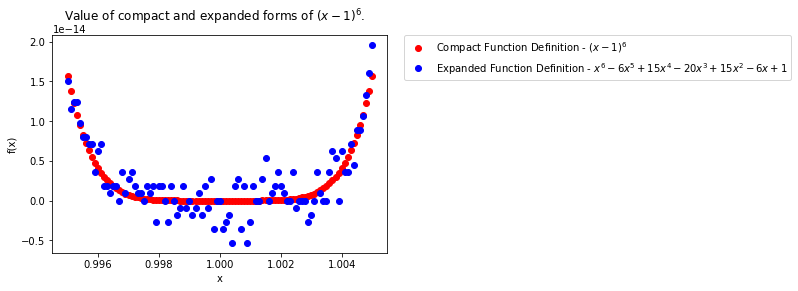

In [91]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def compact_form(x):
    """Compact form of the equation from the question."""
    return (x - 1)**6


def expanded_form(x):
    """Expanded form of the equation from the question."""
    return x**6 - 6 * x**5 + 15 * x**4 - 20 * x**3 + 15 * x**2 - 6 * x + 1


def main():
    # Create a linear spaced set of 101 points on the interval [0.995, 1.005].
    x = np.linspace(0.995, 1.005, 101, dtype=np.float64)
    comp_frm = np.vectorize(compact_form)
    exp_frm = np.vectorize(expanded_form)
    
    result_compact = comp_frm(x)
    result_expanded = exp_frm(x)
    
    # Plot the results.
    fig = plt.figure()
    fig.suptitle(r"Value of compact and expanded forms of $(x - 1)^6$.")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.plot(x, result_compact, 'ro', label=r"Compact Function Definition - $(x-1)^6$")
    plt.plot(x, result_expanded, 'bo', label=r"Expanded Function Definition - $x^6 - 6x^5 + 15x^4 - 20x^3 + 15x^2 - 6x + 1$")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    

main()

# Question 2.5 Code

In [32]:
%matplotlib inline
import numpy as np

class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    
    @classmethod
    def header(cls, text):
        return cls.BOLD + cls.UNDERLINE + text + cls.END
    

def iterative_gaussian_elimination(A, b):
    """Solve the system Ax = b for x using the itterative Gaussian method."""
    # Augmented matrix.
    aug = np.concatenate([A, b], axis=1)

    n = aug.shape[0]
    # Downward.
    for i in range(n):
        pivot = aug[i,i]
        # Scale the row.
        aug[i,:] /= pivot
        
        # Anihilate the entries under the pivot.
        for j in range(i + 1, n):
            anihil_factor = aug[j,i]
            aug[j,:] -= anihil_factor * aug[i,:]
    
    # Upward.
    for i in reversed(range(n)):
        # Anihilate the entries above the pivot.
        for j in range(0, i):
            anihil_factor = aug[j,i]
            aug[j,:] -= anihil_factor * aug[i,:]

    # Return the last column.
    return aug[:,-1]


def compute_residual(A, x, b):
    """Computes the residual r = b - Ax"""
    # Double precision arithmetic containers.
    d_A = np.matrix(A, dtype=np.float64)
    d_x = np.matrix(x, dtype=np.float64)
    d_b = np.matrix(b, dtype=np.float64)
    d_r = d_b - d_A * d_x
    
    # Put the result into a single precision container.
    return np.matrix(d_r, dtype=np.float32)
    

def reduce_residual(A, x, b):
    """Effectively the method for part D."""
    r = compute_residual(A, x, b)
    z = iterative_gaussian_elimination(A, r)
    i = 0
    
    # Continue reducing until all entries in z are 0.
    while any(z):
        i += 1
        x = z + x
        r = compute_residual(A, x, b)
        z = iterative_gaussian_elimination(A, r)
    return x, i


# Define A and b in single precision floating point np arrays.
A = np.matrix('21.0 67.0 88.0 73.0;'
              '76.0 63.0  7.0 20.0;'
              ' 0.0 85.0 56.0 54.0;'
              '19.3 43.0 30.2 29.4', dtype=np.float32)

b = np.matrix('141.0; 109.0; 218.0; 93.7', dtype=np.float32)

# Part (a).
x = iterative_gaussian_elimination(A, b)
print(color.header("Part A"))
print("The value of x after single precision gaussian elimination is\n{}\n"
     .format(x))

# Part (b).
r = compute_residual(A, x, b)
print(color.header("Part B"))
print("The value of the residual r is\n{}\n"
     .format(r))

# Part (c).
z = iterative_gaussian_elimination(A, r)
x = z + x
print(color.header("Part C"))
print("The value of the correction z is\n{}\n"
     .format(z))
print("The corrected value of x is\n{}\n"
     .format(x))

# Part (d).
x, its = reduce_residual(A, x, b)
print(color.header("Part D"))
print("The corrected value of x is (after {} iterations)\n{}\n"
     .format(its + 1, x))

Part A
The value of x after single precision gaussian elimination is
[[-0.99992704]
 [ 2.000323  ]
 [-2.9988637 ]
 [ 3.9983127 ]]

Part B
The value of the residual r is
[[ 4.7683716e-07]
 [-1.0561943e-04]
 [ 2.0742416e-05]
 [-9.5858813e-06]]

Part C
The value of the correction z is
[[-7.2929193e-05]
 [-3.2293634e-04]
 [-1.1358784e-03]
 [ 1.6866578e-03]]

The corrected value of x is
[[-1.       ]
 [ 2.0000002]
 [-2.9999995]
 [ 3.9999993]]

Part D
The corrected value of x is (after 2 iterations)
[[-1.]
 [ 2.]
 [-3.]
 [ 4.]]



# Question 2.6 Code

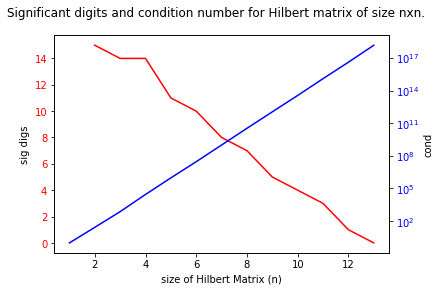

In [88]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def create_hilbert_matrix(n):
    """Creates an nxn Hilbert matrix and the corresponding b vector."""
    H = np.matrix(np.ones([n, n], dtype=np.float64), dtype=np.float64)
    for i in range(n):
        for j in range(n):
            scale_factor = 1 + i + j
            H[i,j] /= scale_factor
    
    x = np.matrix(np.ones([n,1]))
    return H, H * x, x


def matrix_inf_norm(x):
    intermediate = np.zeros([x.shape[0], 1], dtype=np.float64)
    for i in range(x.shape[0]):
        intermediate[i] = sum(abs(x[i,:].A1))
    return max(intermediate)[0]


def infinity_norms(n):
    """Calculate the infinity norms of the residual and the delta x."""
    H, b, x = create_hilbert_matrix(n)
    x_hat = np.linalg.solve(H, b)
    
    r = b - H * x_hat
    d_x = x_hat - x
    
    r_infnorm = matrix_inf_norm(r)
    d_x_infnorm = matrix_inf_norm(d_x)
    
    return r_infnorm, d_x_infnorm


def sig_digits(n):
    """Compute the number of significant digits in the residual norm and delta x."""
    r_norm, d_x_norm = infinity_norms(n)
    
    r_sig_digits = None
    if r_norm == 0:
        r_sig_digits = np.inf
    else:
        r_sig_digits = -int(np.log10(r_norm / n))

    d_x_sig_digits = None
    if d_x_norm == 0:
        d_x_sig_digits = np.inf
    else:
        d_x_sig_digits = -int(np.log10(d_x_norm / n))

    return r_sig_digits, d_x_sig_digits 


ns = []
d_sigs = []
conds = []

n = 1
_, d_x_sig = sig_digits(n)
cond = np.linalg.cond(create_hilbert_matrix(n)[0], p=np.inf)

ns.append(n)
d_sigs.append(d_x_sig)
conds.append(cond)

# If there are 0 significant digits, the error is 100%.
while d_x_sig > 0:
    n += 1
    _, d_x_sig = sig_digits(n)
    cond = np.linalg.cond(create_hilbert_matrix(n)[0], p=np.inf)

    ns.append(n)
    d_sigs.append(d_x_sig)
    conds.append(cond)
    

fig, ax1 = plt.subplots()
fig.suptitle(r"Significant digits and condition number for Hilbert matrix of size nxn.")
ax2 = ax1.twinx()

ax1.plot(ns, d_sigs, color='r')
ax1.set_xlabel('size of Hilbert Matrix (n)')
ax1.set_ylabel('sig digs')

ax2.plot(ns, conds, color='b')
ax2.set_ylabel('cond')
ax2.set_yscale('log')

# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None

color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
plt.show()

# Question 2.9 Code

In [99]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt


def gaussian_elimination(A, b):
    """Perform gaussian elimination without pivoting."""
    aug = np.concatenate([A, b], axis=1)
    
    n = aug.shape[0]
    # Downward.
    for i in range(n):
        # Scale the row.
        aug[i,:] /= aug[i,i]
        
        # Anihilate the entries under the pivot.
        for j in range(i + 1, n):
            anihil_factor = aug[j,i]
            aug[j,:] -= anihil_factor * aug[i,:]
    
    # Upward.
    for i in reversed(range(n)):
        # Anihilate the entries above the pivot.
        for j in range(0, i):
            anihil_factor = aug[j,i]
            aug[j,:] -= anihil_factor * aug[i,:]

    # Return the last column.
    return aug[:,-1]


def compute_residual(A, x, b):
    """Computes the residual r = b - Ax"""
    return b - A * x


def evaluate_matrix(epsilon):
    A = np.matrix('{} 1; 1 1'.format(epsilon))
    b = np.matrix('{}; 2'.format(1 + epsilon))
    return A, gaussian_elimination(A, b), b


def error_of_diff(x):
    intermediate = [x_ ** 2 for x_ in x]
    return math.sqrt(sum(intermediate))


diffs = []
diff_w_res = []
true_solution = np.matrix("1; 1")
for k in range(1, 11):
    epsilon = 10**(-2 * k)
    A, x_hat, b = evaluate_matrix(epsilon)
    difference = x_hat - true_solution
    diffs.append(error_of_diff(difference))
    z = compute_residual(A, x_hat, b)
    x_hat -= z
    difference = x_hat - true_solution
    diff_w_res.append(error_of_diff(difference))
    

print(diffs)
print(diff_w_res)

[0.0, 0.0, 0.0, 1.1102230246251565e-16, 0.0, 0.0001220703125, 0.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 1.1102230246251565e-16, 0.0, 0.00017263349150062197, 0.0, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951]
